In [1]:
# load libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# load dataset

pima = pd.read_csv("Dataset_of_Diabetes.csv")
pima.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
transf1 = {'F':0,'M':1}
pima['Gender'] = pima['Gender'].map(transf1)
transf2 = {'N':0,'Y':1, 'P':2}
pima['CLASS'] = pima['CLASS'].map(transf2)

In [4]:
# determine target (dependent) and feature (independent) variables

feature_cols = ['ID', 'No_Pation', 'Gender', 'Chol', 'AGE', 'Urea', 'Cr', 'HbA1c', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
X = pima[feature_cols] # features
y = pima.CLASS # target

In [5]:
# split dataset into training and test set (70:30) ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
# create Decision Tree classifier object
clf = DecisionTreeClassifier()
# train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.97


## Visualizing the tree

We will plot the tree to see its root, branches, and nodes using the following functions:

* **StringIO()**: creates an object (empty in this case) to receive a string buffer (the tree will be created first as a string before as an image) in DOT (graph description language) format.
* **export_graphviz()**: this function exports the tree in DOT format, generating a representation of the decision tree, which is written into the ‘out_file’.
* **graph_from_dot_data()**: will use the DOT object to create the graph.
* **Image()**: uses raw data to return an image (png, jpeg, gif).

In [8]:
# import libraries for decision tree visualization

from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

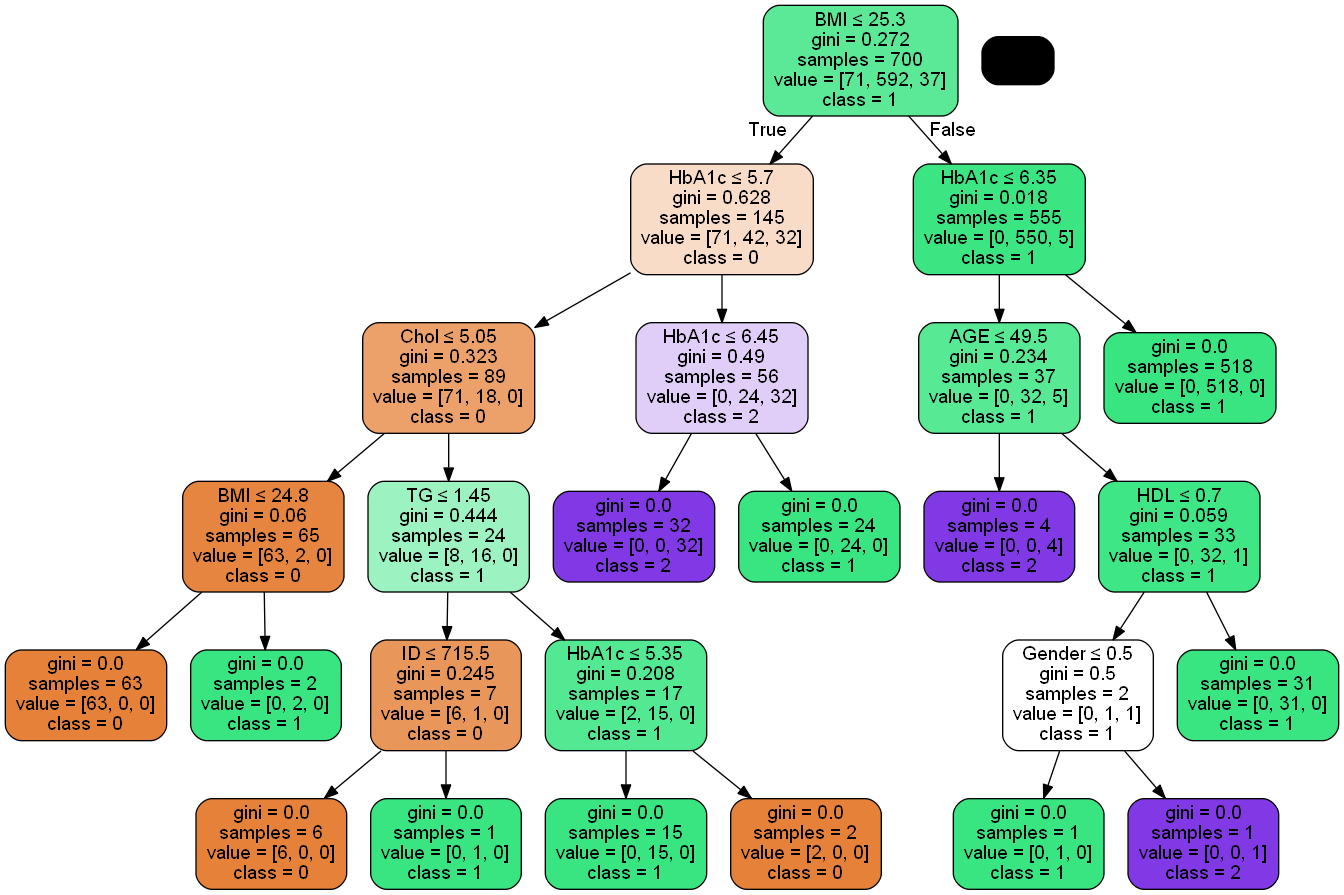

In [9]:
# visualize decision tree

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Pruning

The complete decision tree is difficult to interpret due to the complexity of the outcome. Pruning/shortening a tree is essential to ease our understanding of the outcome and optimize it. This optimization can be done in one of three ways:

* **criterion**: optional (default="gini") or Choose attribute selection measure

Defines what function will be used to measure the quality of a split. The options are "gini" and "entropy". The Gini ratio measures the impurity of the node in a decision tree. One can assume that a node is pure when all of its records belong to the same class.

* **splitter**: string, optional (default="best") or Split Strategy

Defines the strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.

* **max_depth**: int or None, optional (default=None) or Maximum Depth of a Tree

Defines the maximum depth of the tree. If it’s None, the tree will be as long as possible, when all the leaves are pure (risk of overfitting the model).

In [10]:
# create Decision Tree classifier object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# train Decision Tree Classifier
clf = clf.fit(X_train,y_train)

# predict the response for test dataset
y_pred = clf.predict(X_test)

# compute model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9533333333333334


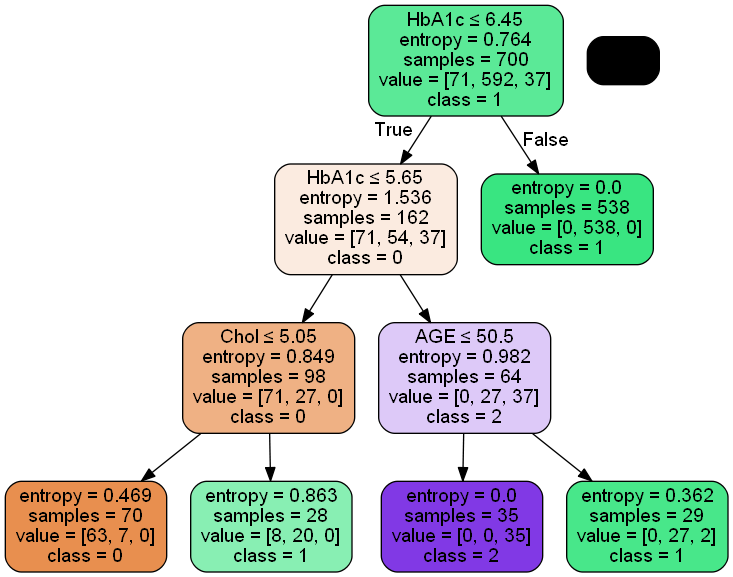

In [11]:
# visualize pre-prunned tree

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                    filled=True, rounded=True,
                    special_characters=True, feature_names = feature_cols,class_names=['0','1', '2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes2.png')
Image(graph.create_png())

In [12]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='micro' ))
print("Recall:", metrics.recall_score(y_test, y_pred, average='micro'))

Accuracy: 0.9533333333333334
Precision: 0.9533333333333334
Recall: 0.9533333333333334


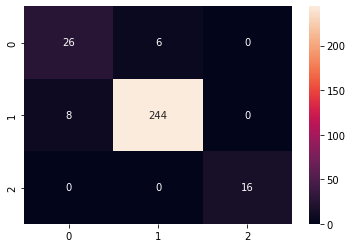

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pylab as pl

cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True,fmt= 'd')
pl.show()

In [1]:
def Matr():
    '''La matriz de confusión es un método de evaluación de rendimiento de un modelo de clasificación (a veces se usa en regresión). La matriz compara los valores reales con los predichos por el modelo de aprendizaje. Esto nos ayuda a ver que tan bien está funcionando nuestro modelo\n'''
print(Matr.__doc__)

La matriz de confusión es un método de evaluación de rendimiento de un modelo de clasificación (a veces se usa en regresión). La matriz compara los valores reales con los predichos por el modelo de aprendizaje. Esto nos ayuda a ver que tan bien está funcionando nuestro modelo

